In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [8]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from psdr.demos import otl_circuit, build_otl_circuit_domain
from psdr import PolynomialRidgeApproximation

# Initializing the domain and function

In [4]:
dom = build_otl_circuit_domain()
X = dom.sample(100)
X_norm = dom.normalize(X)
fX = otl_circuit(X)

# Building a ridge approximation

psdr/poly_ridge.py:46: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  return scipy.linalg.lstsq(A, b, cond = -1)[0]


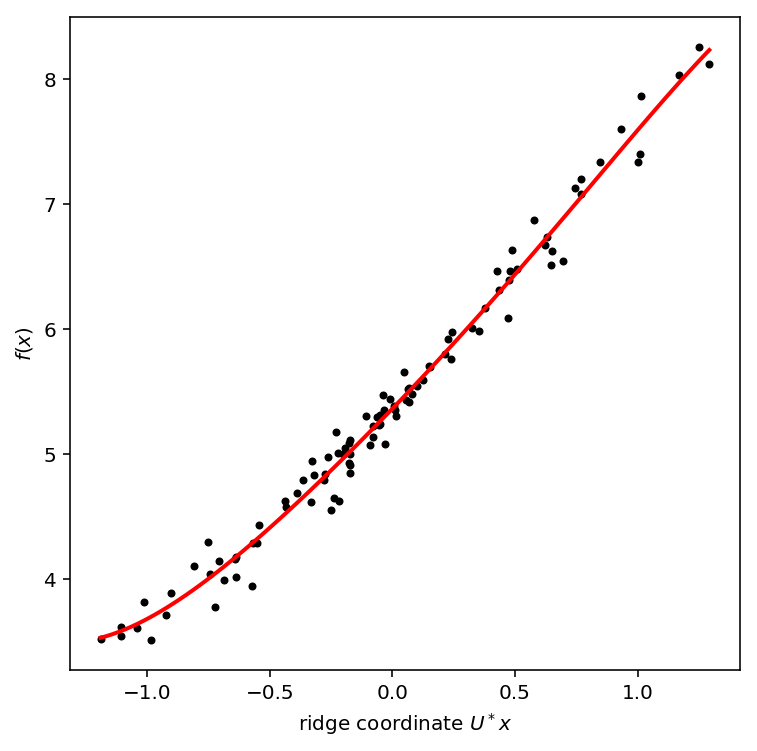

In [5]:
pra = PolynomialRidgeApproximation(degree = 5, subspace_dimension = 1)
pra.fit(X_norm, fX)
pra.plot()

# Sampling at a point in the ridge direction

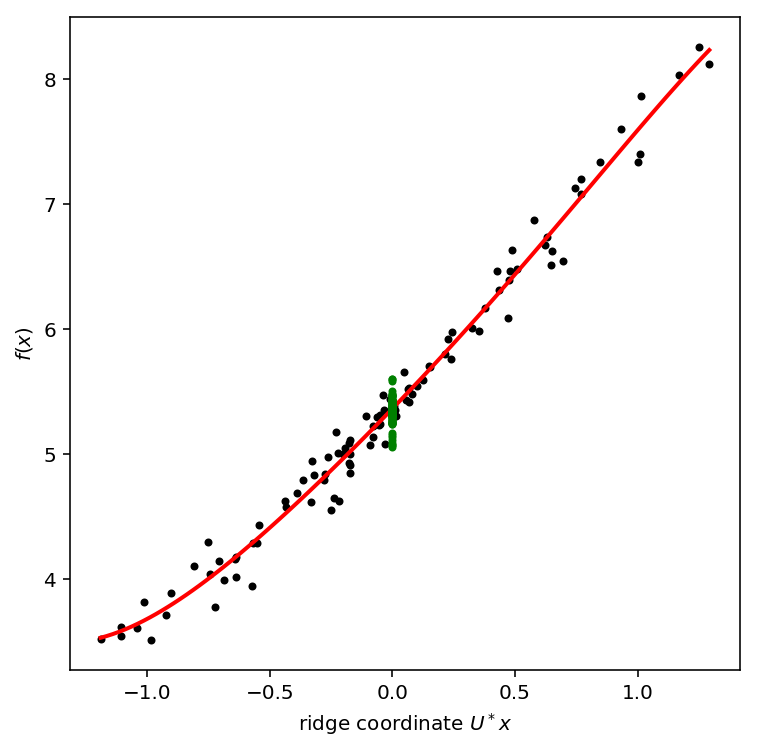

In [14]:
dom_norm = dom.normalized_domain()
dom_norm_constrained = dom_norm.add_constraint(A_eq = pra.U.T, b_eq = np.array([0]))
Xsamp_norm = dom_norm_constrained.sample(100)
Xsamp = dom.unnormalize(Xsamp_norm)
fXsamp = otl_circuit(Xsamp)

fig, ax = plt.subplots(figsize = (6,6))
pra.plot(axes = ax)
ax.plot(np.dot(pra.U.T, Xsamp_norm.T).T, fXsamp, 'g.')